<a href="https://colab.research.google.com/github/MoizAhmed2517/Classification_projects/blob/main/Mushroom_Classification_Using_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is Mushroom Poisonous or edible?

## Data Source
Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


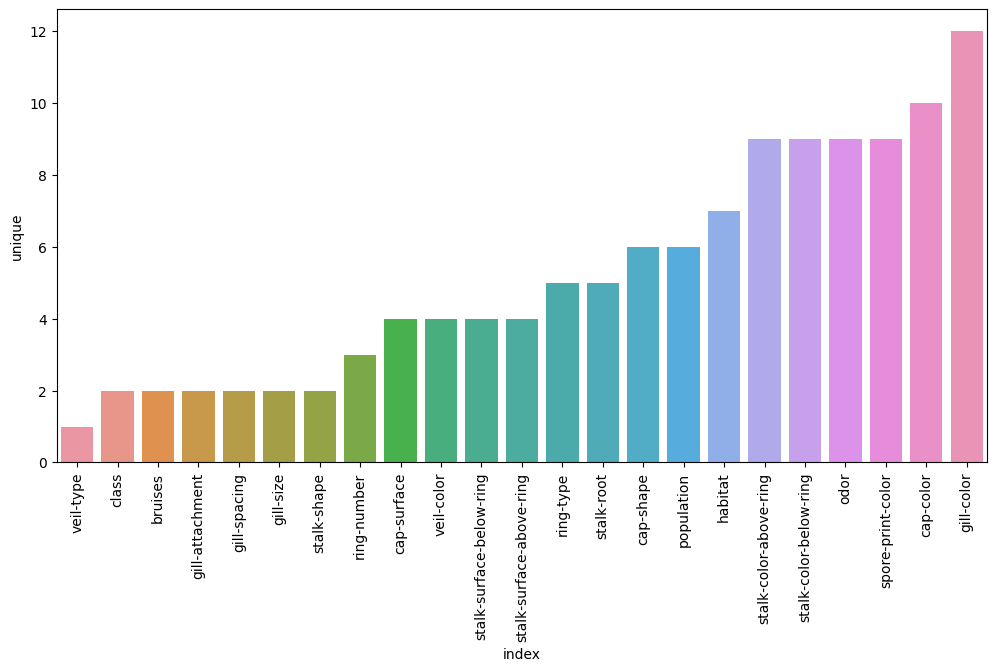

In [3]:
plt.figure(figsize=(12,6), dpi=100)
feat_uni = df.describe().transpose().reset_index().sort_values('unique')
sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90);
plt.show()

In [7]:
X = df.drop('class', axis=1)
y = df['class']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.15)

In [8]:
model_1 = GradientBoostingClassifier()
model_1.fit(X_train, y_train)
y_preds = model_1.predict(X_test)

In [9]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [11]:
def plot_confusion_matrix(model, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  plt.figure(figsize=(12, 12), dpi=100)
  disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
  disp.plot()
  plt.show()

<Figure size 1200x1200 with 0 Axes>

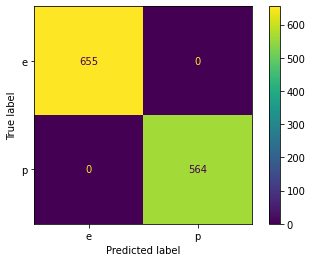

In [12]:
plot_confusion_matrix(model_1, y_test, y_preds)

In [17]:
model_2 = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1,0.05,0.2],
              'max_depth': [3,4,5]}
GSCV = GridSearchCV(model_2, param_grid, verbose=2)
GSCV.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=4, n_e

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]},
             verbose=2)

In [18]:
GSCV.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [21]:
y_pred = GSCV.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



<Figure size 1200x1200 with 0 Axes>

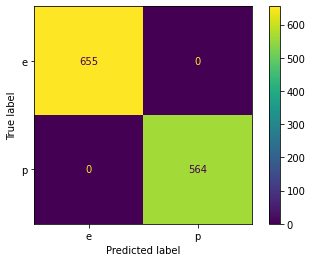

In [24]:
plot_confusion_matrix(GSCV, y_test, y_pred)

In [25]:
GSCV.best_estimator_.feature_importances_

array([2.91150176e-04, 4.40008600e-17, 0.00000000e+00, 0.00000000e+00,
       1.11912577e-16, 1.04902579e-03, 0.00000000e+00, 1.27734798e-06,
       0.00000000e+00, 1.71111951e-17, 0.00000000e+00, 0.00000000e+00,
       6.16484059e-18, 0.00000000e+00, 0.00000000e+00, 1.01895536e-08,
       2.31056241e-03, 5.15467547e-02, 6.24175887e-04, 2.09280914e-02,
       1.82499853e-02, 4.14898956e-05, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.04355233e-02, 0.00000000e+00, 3.61773593e-17, 4.40017052e-18,
       3.39872261e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.20852137e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.92091629e-04, 2.03408198e-04, 1.35978778e-01, 0.00000000e+00,
       2.18936437e-02, 3.60010033e-03, 1.49613350e-03, 4.95063766e-06,
       0.00000000e+00, 2.54090956e-03, 4.42028091e-02, 2.19363548e-03,
       0.00000000e+00, 0.00000000e+00, 4.59787330e-06, 0.00000000e+00,
      

In [33]:
features = pd.DataFrame(index=X.columns,
                        data=GSCV.best_estimator_.feature_importances_,
                        columns=['Importance'])

imp_feature = features[features['Importance']>0.001].sort_values('Importance')

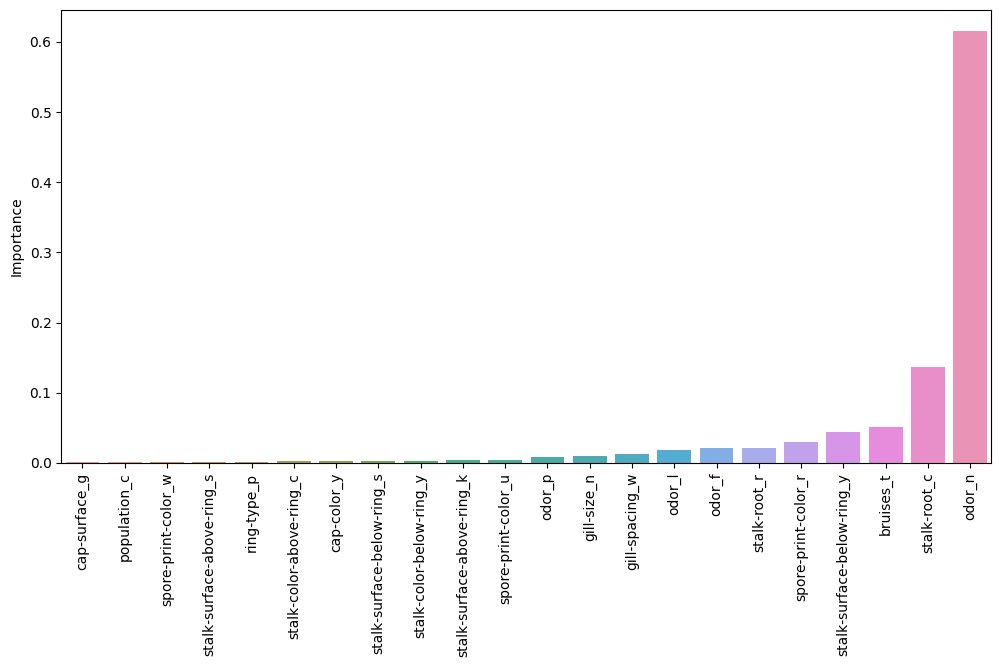

In [34]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(data=imp_feature, x=imp_feature.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

Using Gradient Boosting Classifier which is performing much better in comparison with AdaBoost. Hence correctly classifying between poisonous and edible mushrooms